<h3>Principal Component Analysis (PCA):</h3>

* PCA is an unsupervised learning technique for reducing the dimensionality of a large dataset consisting of a large number of features.
* During dimensionality reduction, PCA retains as much as possible of the variation present in the original dataset.
* While computing PCA of a dataset of N features, the PCA algorithm can generate maximum N number of principal components (PC) (PC_1...PC_N).
* Along with data dimensionality reduction, PCA is used across a variety of other applications, for example, exploratory data analysis, data compression, de-noising signal data and many more.
* We can visualize data upto maximum of 3 dimensions or a dataset containing 3 features. If a dataset has, for example, 20 features, it is not possible to visualize the 20 features in 20 dimensional space.
* PCA helps us to find the most significant feature in a higher dimensional dataset and makes the data visualization easy in 2D and 3D space.

<h3>Step by step implementation of PCA Algorithm:</h3>

Suppose that we have a simple dataset with just two attributes x1 and x2.

In [50]:
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt

In [51]:
def data_plotting_2d(x, y):
    plt.figure('X1 vs X2')
    plt.plot(x, y, 'x')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [52]:
x1 = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
x2 = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]

Plotting x1 and x2 in 2D plane-

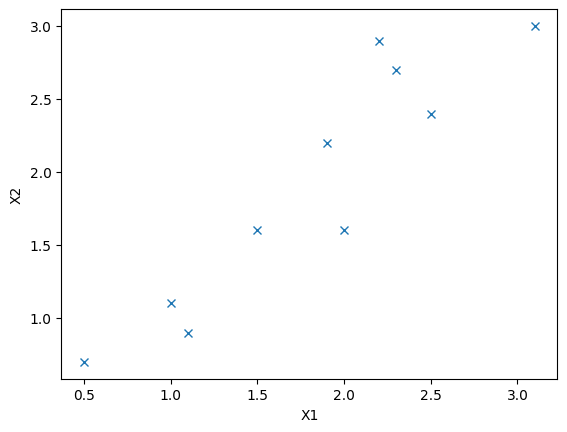

In [53]:
data_plotting_2d(x1, x2)

PCA can be computed using the following six steps-

<h3>1. Data Standardization (Computing Z-mean):</h3>

* Calculate mean values of the features x1 and x2
* Calculate the deviation of each element from the calculated mean of corresponding feature (x1/x2)
* Devide the result by the Standard Deviation of x1/x2

In [54]:
def compute_z_mean(X):
    # find feature mean value
    mean = np.mean(X)
    # find deviation of feature X
    deviation = X - mean
    # standard deviation of the feature
    std_dev = np.std(X)
    # finally calc z mean
    z_mean = deviation / std_dev
    return z_mean

In [55]:
# find standardized x1 and x2
Z1 = compute_z_mean(x1)
print(f'Z1:\n {Z1}')

Z2 = compute_z_mean(x2)
print(f'Z2:\n {Z2}')

Z3 = np.array([Z1.T, Z2.T])
print(f'Z3:\n {Z3}')

Z1:
 [ 0.92627881 -1.7585873   0.52354889  0.12081898  1.73173864  0.6577922
  0.25506228 -1.08737078 -0.41615425 -0.95312747]
Z2:
 [ 0.61016865 -1.506743    1.23278973  0.36112022  1.35731394  0.9837413
 -0.38602507 -1.00864614 -0.38602507 -1.25769457]
Z3:
 [[ 0.92627881 -1.7585873   0.52354889  0.12081898  1.73173864  0.6577922
   0.25506228 -1.08737078 -0.41615425 -0.95312747]
 [ 0.61016865 -1.506743    1.23278973  0.36112022  1.35731394  0.9837413
  -0.38602507 -1.00864614 -0.38602507 -1.25769457]]


<h3>2. Find Covariance matrix:</h3>

A dataset with N number of features will have N*N covariance matrix.

In [56]:
covar = np.cov(np.array([x1, x2]))
covar

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

<h3>3. Compute Eigenvalue and Eigenvector of the covariance matrix:</h3>

Compute the Eigenvalue and Eigenvector and sort them in decreasing order. The reason for performing ordering is: the PC with the largest Eigenvalue contains the maximum variance, hence containing maximum information.

In [57]:
def compute_eigen_values_and_vectors(covariance):
    # compute eigen vectors and values
    eigen_valuess, eigen_vectors = la.eig(covariance)
    # sort eigen values in decreasing order
    arg_indices = eigen_valuess.argsort()
    eigen_valuess = eigen_valuess[arg_indices[::-1]]
    eigen_vectors = eigen_vectors[arg_indices[::-1]]
    
    return eigen_valuess, eigen_vectors

In [58]:
eigen_valuess, eigen_vectors = compute_eigen_values_and_vectors(covar)
print(f'Eigen values:\n {eigen_valuess}')
print(f'Eigen vectors:\n {eigen_vectors}')

Eigen values:
 [1.28402771 0.0490834 ]
Eigen vectors:
 [[ 0.6778734  -0.73517866]
 [-0.73517866 -0.6778734 ]]


<h3>4. Compute the percentage variance of the Eigen vectors:</h3>

Pencentage variance of an Eigen vector = (Eigen value / sum of Eigen values) * 100

In [59]:
# Pencentage variance of the first Eigen vector
variance_percentage_1 = (eigen_valuess[0] / np.sum(eigen_valuess)) * 100
variance_percentage_1

96.31813143486458

In [60]:
# Pencentage variance of the first Eigen vector
variance_percentage_2 = (eigen_valuess[1] / np.sum(eigen_valuess)) * 100
variance_percentage_2

3.681868565135408

The first PC has extracted most of the information (96.3%). Let's assume that the rest 3.6% of information can be ignored by taking the first PC into consideration.

<h3>5. Use PC1 set to construct new feature set:</h3>

In [61]:
feature_vector = eigen_vectors[0:1].T
feature_vector

array([[ 0.6778734 ],
       [-0.73517866]])

New feature calculation:

New feature set = Standardized data * feature vector

In [62]:
# compute new feature set using PC1
new_feature = np.matmul(Z3.T, feature_vector)
new_feature

array([[ 0.17931679],
       [-0.08437426],
       [-0.55142083],
       [-0.18358791],
       [ 0.17603132],
       [-0.27732577],
       [ 0.45669732],
       [ 0.00443539],
       [ 0.00169749],
       [ 0.27853044]])

<br>
Ref.

https://www.nature.com/articles/nmeth.4346

https://www.enjoyalgorithms.com/